In [1]:
import sys

sys.path.append("../")

import datetime
from sqlalchemy import text
from src.utils.azure_connection import get_azure_engine
import time
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

engine = get_azure_engine()

#FETCH DATA
def fetch_table(engine):
    with engine.connect() as connection:
        print("Fetching content data asset table...")
        select_query = 'SELECT * from trial_ba_content_data_asset'      
        print(select_query)
        result = connection.execute(text(select_query))
        df = pd.DataFrame(result.fetchall(), columns=result.keys())

    if 'video_id' in df.columns:
        df['video_id'] = df['video_id'].astype(str)

    # Standardize sub_category case to upper
    if 'sub_category' in df.columns:
        df['sub_category'] = df['sub_category'].str.lower()

    return df

#fetch data
video_df = fetch_table(engine)

# Convert video_posted_timestamp to datetime
video_df['video_posted_timestamp'] = pd.to_datetime(video_df['video_posted_timestamp'])

# Get today's date
today = datetime.today()
begin_date = today - timedelta(days=365)

# Filter the DataFrame to include only rows where the 'video_posted_timestamp' is within the last 365 days
filtered_video_df = video_df[video_df['video_posted_timestamp'] >= begin_date]

# Display the filtered data
filtered_video_df

/Users/goldiusleonard/miniconda3/envs/trend-prediction/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Fetching content data asset table...
SELECT * from trial_ba_content_data_asset


,id,video_id,identification_id,profile_api_id,user_handle,category,sub_category,ai_topic,theme_main,theme_1,...,ai_flagged,is_flagged,is_reported,is_resolved,process_time,video_source,crawling_source,video_posted_timestamp,crawling_timestamp,ss_process_timestamp
0,4951,7366590731089202439,TKHSL7366590731089202439,7.223967e+18,melayubersatu1,Hate Speech,royal,Royal Reman,Historical resistance,Hate speech,...,1,1,0,0,9.777560,TikTok,user,2024-05-08 11:34:27,2024-08-29 04:19:26,2024-09-05 14:07:04
1,4952,7370927704440409362,TKHSL7370927704440409362,7.101142e+18,dekatmic,Hate Speech,religion,Religion Dajjal,Property Law,None,...,1,1,0,0,35.918453,TikTok,user,2024-05-20 04:04:09,2024-08-29 04:19:29,2024-09-05 14:07:14
2,4953,7366482677458849032,TKHSM7366482677458849032,7.223967e+18,melayubersatu1,Hate Speech,race,Race Aesthetic,Live broadcast,Ethnic stereotypes,...,1,1,0,0,10.635680,TikTok,user,2024-05-08 04:35:10,2024-08-29 04:19:29,2024-09-05 14:07:49
3,4954,7365804467545033992,TKHSL7365804467545033992,7.223967e+18,melayubersatu1,Hate Speech,royal,Royal Heritage,No audio,Misinformation,...,1,1,0,0,14.052067,TikTok,user,2024-05-06 08:43:23,2024-08-29 04:19:31,2024-09-05 14:08:09
4,4955,7369497992073661703,TKHSL7369497992073661703,7.101142e+18,dekatmic,Hate Speech,religion,Religion Achievement,Inheritance Rights,Inappropriate comments,...,1,1,0,0,10.821989,TikTok,user,2024-05-16 07:36:07,2024-08-29 04:19:33,2024-09-05 14:08:25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1202,6153,7348285339049528583,TKHSL7348285339049528583,6.768813e+18,mihaisbae,Hate Speech,religion,None,None,None,...,1,1,0,0,36.654187,TikTok,user,2024-03-20 03:40:14,2024-09-10 06:05:34,2024-09-11 10:15:42
1203,6154,7347613770706849032,TKHSL7347613770706849032,6.768813e+18,mihaisbae,Hate Speech,religion,None,None,None,...,1,1,0,0,33.576140,TikTok,user,2024-03-18 08:14:10,2024-09-10 06:05:36,2024-09-11 10:16:45
1204,6155,7345345580190698759,TKHSL7345345580190698759,6.768813e+18,mihaisbae,Hate Speech,religion,None,None,None,...,1,1,0,0,28.080216,TikTok,user,2024-03-12 05:32:23,2024-09-10 06:05:39,2024-09-11 10:17:30
1205,6156,7330237376763071752,TKHSL7330237376763071752,6.768813e+18,mihaisbae,Hate Speech,religion,None,None,None,...,1,1,0,0,31.135592,TikTok,user,2024-01-31 12:24:52,2024-09-10 06:05:56,2024-09-11 10:23:04


INFO:prophet:Found custom seasonality named 'weekly', disabling built-in 'weekly' seasonality.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /var/folders/77/d46tdgsj1n37996vbzqp4qy40000gp/T/tmp88t7f24i/h_sdywfk.json
DEBUG:cmdstanpy:input tempfile: /var/folders/77/d46tdgsj1n37996vbzqp4qy40000gp/T/tmp88t7f24i/059hfnit.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/Users/goldiusleonard/miniconda3/envs/trend-prediction/lib/python3.11/site-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38539', 'data', 'file=/var/folders/77/d46tdgsj1n37996vbzqp4qy40000gp/T/tmp88t7f24i/h_sdywfk.json', 'init=/var/folders/77/d46tdgsj1n37996vbzqp4qy40000gp/T/tmp88t7f24i/059hfnit.json', 'output', 'file=/var/folders/77/d46tdgsj1n37996vbzqp4qy40000gp/T/tmp88t7f24i/prophet_model5bjibp0s/prophet_model-20241217234241.csv', 'method=optimize', 'algorithm=l

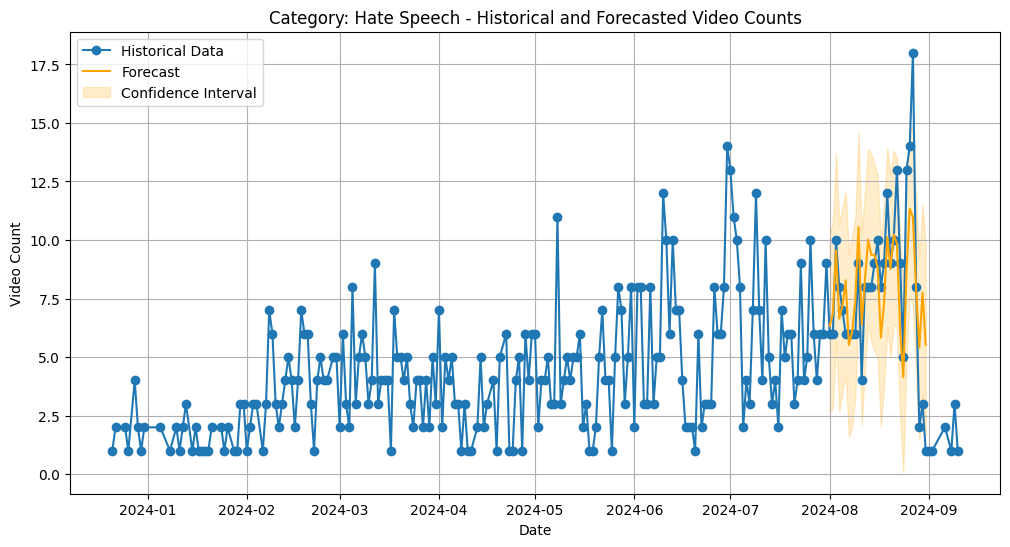

Model Evaluation Metrics:
      Category       MAE      RMSE   MAPE (%)
0  Hate Speech  1.821281  2.447754  40.865627


In [2]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Initialize a DataFrame to store all forecasts
all_forecasts = pd.DataFrame()

# Simulated user input
user_selection = 'category'  # Could be 'category', 'sub_category', or 'ai_topic'
start_date = '2024-08-01'
end_date = '2024-08-31'

# Iterate through each category and predict video counts
unique_categories = filtered_video_df['category'].unique()
evaluation_results = []

for category in unique_categories:
    # Filter data for the current category
    category_data = filtered_video_df[filtered_video_df['category'] == category]

    # Group by date and count videos
    grouped_data = category_data.groupby(category_data['video_posted_timestamp'].dt.date).size().reset_index(name='count')

    # Prepare data for Prophet
    time_series_data = grouped_data.rename(columns={'video_posted_timestamp': 'ds', 'count': 'y'})

    # Initialize the Prophet model
    # Specify changepoints for better control
    num_changepoints = 5
    changepoints = category_data['video_posted_timestamp'].quantile(np.linspace(0.1, 0.9, num_changepoints))

    # Initialize the Prophet model with optimized parameters
    model = Prophet(
        growth='linear',
        changepoint_prior_scale=1.0,
        yearly_seasonality=False,
        seasonality_mode='multiplicative',
        seasonality_prior_scale=14,
        changepoints=changepoints,
        interval_width=0.95,
    )

    # Add custom seasonalities
    model.add_seasonality(name='weekly', period=7, fourier_order=5)
    model.add_seasonality(name='monthly', period=30.5, fourier_order=30)

    model.fit(time_series_data)

    # Create a future DataFrame specifically for the start_date to end_date range
    future_dates = pd.date_range(start=start_date, end=end_date)
    future = pd.DataFrame({'ds': future_dates})

    # Predict for the specified date range
    forecast = model.predict(future)

    # Modify predicted video counts to ensure they are not negative
    forecast['yhat'] = forecast['yhat'].clip(lower=0)
    forecast['yhat_lower'] = forecast['yhat_lower'].clip(lower=0)
    forecast['yhat_upper'] = forecast['yhat_upper'].clip(lower=0)

    # Add the forecast to the result DataFrame
    forecast['category'] = category
    all_forecasts = pd.concat([all_forecasts, forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'category']]], ignore_index=True)

    # Convert 'ds' column to datetime format in both DataFrames
    time_series_data['ds'] = pd.to_datetime(time_series_data['ds'])
    forecast['ds'] = pd.to_datetime(forecast['ds'])

    # Merge historical and forecasted data
    merged_data = pd.merge(time_series_data, forecast[['ds', 'yhat']], on='ds', how='inner')
    
    # Calculate evaluation metrics
    mae = mean_absolute_error(merged_data['y'], merged_data['yhat'])
    rmse = np.sqrt(mean_squared_error(merged_data['y'], merged_data['yhat']))
    mape = np.mean(np.abs((merged_data['y'] - merged_data['yhat']) / merged_data['y'])) * 100

    evaluation_results.append({
        'Category': category,
        'MAE': mae,
        'RMSE': rmse,
        'MAPE (%)': mape
    })

    # Plot historical and forecasted data
    plt.figure(figsize=(12, 6))
    plt.plot(time_series_data['ds'], time_series_data['y'], label='Historical Data', marker='o')
    plt.plot(forecast['ds'], forecast['yhat'], label='Forecast', color='orange')
    plt.fill_between(
        forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='orange', alpha=0.2, label='Confidence Interval'
    )
    plt.title(f"Category: {category} - Historical and Forecasted Video Counts")
    plt.xlabel("Date")
    plt.ylabel("Video Count")
    plt.legend()
    plt.grid()
    plt.show()

# Rename columns for clarity
all_forecasts.rename(columns={'ds': 'Date', 'yhat': 'Predicted Video Count'}, inplace=True)

# Filter the forecast table to include only the specified date range
filtered_forecasts = all_forecasts[(all_forecasts['Date'] >= start_date) & (all_forecasts['Date'] <= end_date)]

# Display the final forecast table
# print(filtered_forecasts)

# Display the evaluation results
evaluation_df = pd.DataFrame(evaluation_results)
print("Model Evaluation Metrics:")
print(evaluation_df)

INFO:prophet:Found custom seasonality named 'weekly', disabling built-in 'weekly' seasonality.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /var/folders/77/d46tdgsj1n37996vbzqp4qy40000gp/T/tmp88t7f24i/5zsibgmg.json
DEBUG:cmdstanpy:input tempfile: /var/folders/77/d46tdgsj1n37996vbzqp4qy40000gp/T/tmp88t7f24i/wolpju7l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/Users/goldiusleonard/miniconda3/envs/trend-prediction/lib/python3.11/site-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89068', 'data', 'file=/var/folders/77/d46tdgsj1n37996vbzqp4qy40000gp/T/tmp88t7f24i/5zsibgmg.json', 'init=/var/folders/77/d46tdgsj1n37996vbzqp4qy40000gp/T/tmp88t7f24i/wolpju7l.json', 'output', 'file=/var/folders/77/d46tdgsj1n37996vbzqp4qy40000gp/T/tmp88t7f24i/prophet_model7z3i8b1v/prophet_model-20241217234242.csv', 'method=optimize', 'algorithm=n

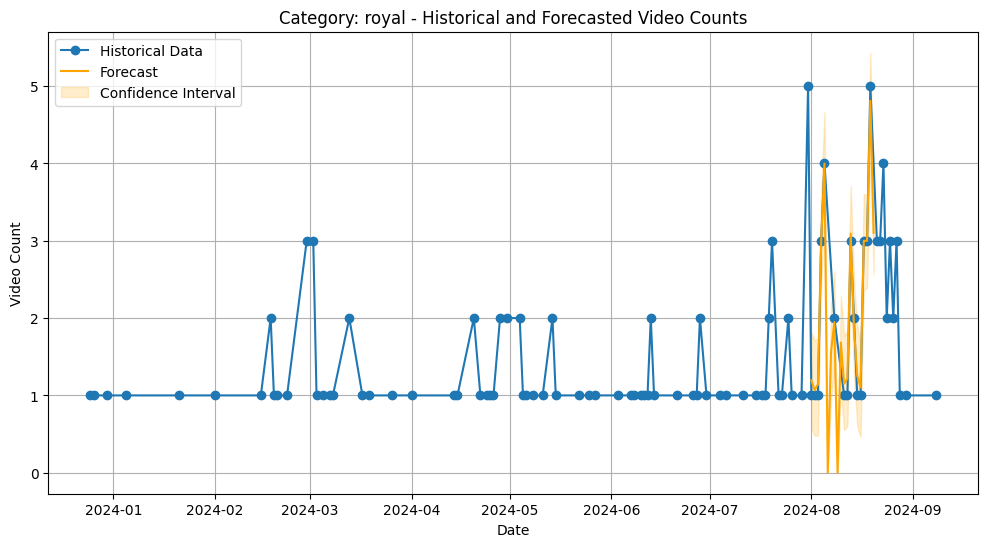

INFO:prophet:Found custom seasonality named 'weekly', disabling built-in 'weekly' seasonality.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /var/folders/77/d46tdgsj1n37996vbzqp4qy40000gp/T/tmp88t7f24i/x5oa8avc.json
DEBUG:cmdstanpy:input tempfile: /var/folders/77/d46tdgsj1n37996vbzqp4qy40000gp/T/tmp88t7f24i/7j_ldtpu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/Users/goldiusleonard/miniconda3/envs/trend-prediction/lib/python3.11/site-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91274', 'data', 'file=/var/folders/77/d46tdgsj1n37996vbzqp4qy40000gp/T/tmp88t7f24i/x5oa8avc.json', 'init=/var/folders/77/d46tdgsj1n37996vbzqp4qy40000gp/T/tmp88t7f24i/7j_ldtpu.json', 'output', 'file=/var/folders/77/d46tdgsj1n37996vbzqp4qy40000gp/T/tmp88t7f24i/prophet_modelnvd07ai4/prophet_model-20241217234242.csv', 'method=optimize', 'algorithm=l

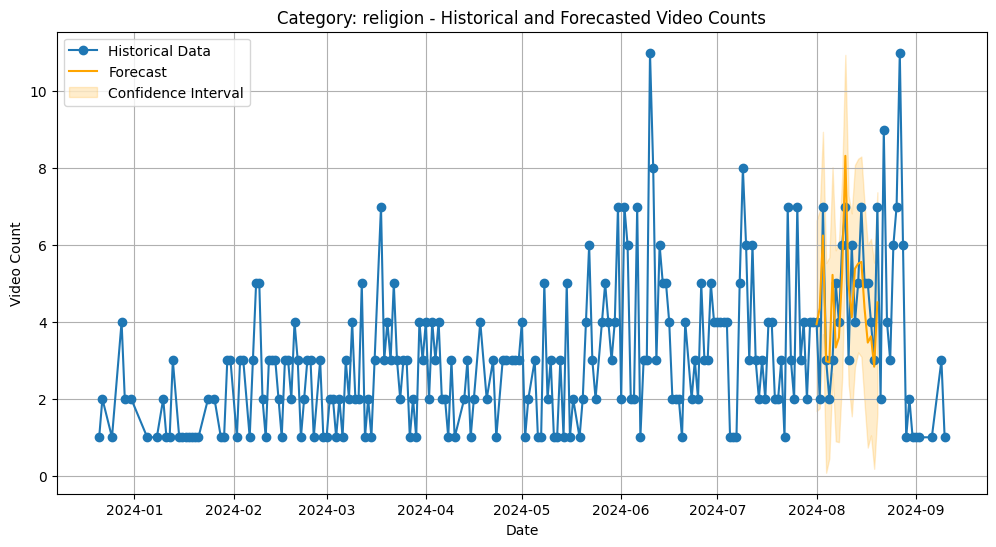

INFO:prophet:Found custom seasonality named 'weekly', disabling built-in 'weekly' seasonality.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /var/folders/77/d46tdgsj1n37996vbzqp4qy40000gp/T/tmp88t7f24i/eh3hd25v.json
DEBUG:cmdstanpy:input tempfile: /var/folders/77/d46tdgsj1n37996vbzqp4qy40000gp/T/tmp88t7f24i/rbso8gvt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/Users/goldiusleonard/miniconda3/envs/trend-prediction/lib/python3.11/site-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68521', 'data', 'file=/var/folders/77/d46tdgsj1n37996vbzqp4qy40000gp/T/tmp88t7f24i/eh3hd25v.json', 'init=/var/folders/77/d46tdgsj1n37996vbzqp4qy40000gp/T/tmp88t7f24i/rbso8gvt.json', 'output', 'file=/var/folders/77/d46tdgsj1n37996vbzqp4qy40000gp/T/tmp88t7f24i/prophet_modelrrowgf8p/prophet_model-20241217234243.csv', 'method=optimize', 'algorithm=l

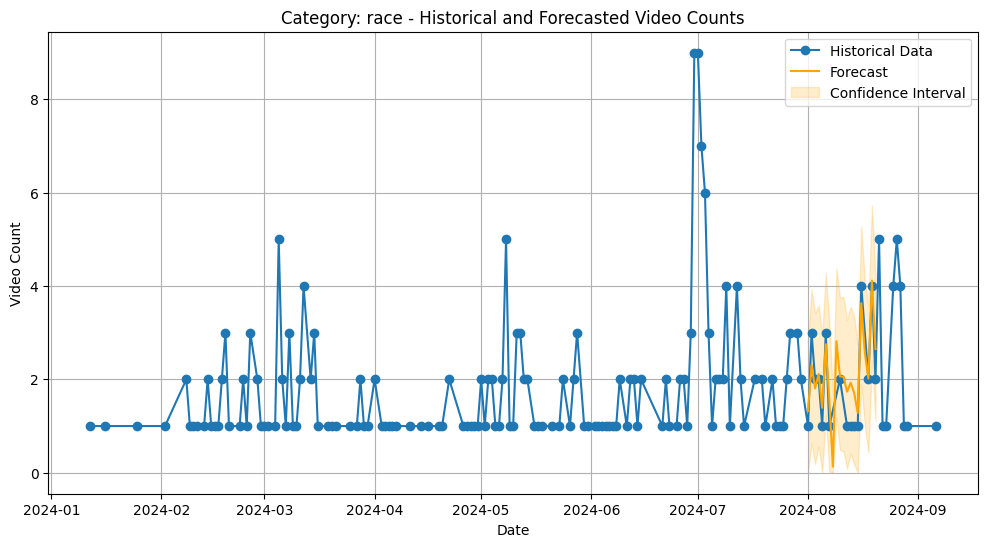

Model Evaluation Metrics:
      Category       MAE      RMSE   MAPE (%)
0  Hate Speech  1.821281  2.447754  40.865627


In [3]:
# Initialize a DataFrame to store all forecasts
all_forecasts = pd.DataFrame()

# Simulated user input
user_selection = 'sub_category'  # Could be 'category', 'sub_category', or 'ai_topic'
start_date = '2024-08-01'
end_date = '2024-08-20'

# Iterate through each category and predict video counts
unique_categories = filtered_video_df['sub_category'].unique()
for category in unique_categories:
    # Filter data for the current category
    category_data = filtered_video_df[filtered_video_df['sub_category'] == category]

    # Group by date and count videos
    grouped_data = category_data.groupby(category_data['video_posted_timestamp'].dt.date).size().reset_index(name='count')

    # Prepare data for Prophet
    time_series_data = grouped_data.rename(columns={'video_posted_timestamp': 'ds', 'count': 'y'})

    # Initialize the Prophet model
    num_changepoints = 5
    changepoints = category_data['video_posted_timestamp'].quantile(np.linspace(0.1, 0.9, num_changepoints))
    model = Prophet(
        growth='linear',
        changepoint_prior_scale=1.0,
        yearly_seasonality=False,
        seasonality_mode='multiplicative',
        seasonality_prior_scale=14,
        changepoints=changepoints,
        interval_width=0.95,
    )
    model.add_seasonality(name='weekly', period=7, fourier_order=5)
    model.add_seasonality(name='monthly', period=30.5, fourier_order=30)
    
    model.fit(time_series_data)

    # Create a future DataFrame specifically for the start_date to end_date range
    future_dates = pd.date_range(start=start_date, end=end_date)
    future = pd.DataFrame({'ds': future_dates})

    # Predict for the specified date range
    forecast = model.predict(future)

    # Modify predicted video counts to ensure they are not negative
    forecast['yhat'] = forecast['yhat'].clip(lower=0)
    forecast['yhat_lower'] = forecast['yhat_lower'].clip(lower=0)
    forecast['yhat_upper'] = forecast['yhat_upper'].clip(lower=0)

    # Add the forecast to the result DataFrame
    forecast['sub_category'] = category
    all_forecasts = pd.concat([all_forecasts, forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'sub_category']]], ignore_index=True)

    # Plot historical and forecasted data
    plt.figure(figsize=(12, 6))
    plt.plot(time_series_data['ds'], time_series_data['y'], label='Historical Data', marker='o')
    plt.plot(forecast['ds'], forecast['yhat'], label='Forecast', color='orange')
    plt.fill_between(
        forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='orange', alpha=0.2, label='Confidence Interval'
    )
    plt.title(f"Category: {category} - Historical and Forecasted Video Counts")
    plt.xlabel("Date")
    plt.ylabel("Video Count")
    plt.legend()
    plt.grid()
    plt.show()

# Rename columns for clarity
all_forecasts.rename(columns={'ds': 'Date', 'yhat': 'Predicted Video Count'}, inplace=True)

# Filter the forecast table to include only the specified date range
filtered_forecasts = all_forecasts[(all_forecasts['Date'] >= start_date) & (all_forecasts['Date'] <= end_date)]

# Display the final forecast table
# print(filtered_forecasts)

# Display the evaluation results
evaluation_df = pd.DataFrame(evaluation_results)
print("Model Evaluation Metrics:")
print(evaluation_df)

INFO:prophet:Found custom seasonality named 'weekly', disabling built-in 'weekly' seasonality.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /var/folders/77/d46tdgsj1n37996vbzqp4qy40000gp/T/tmp88t7f24i/kct6ig0c.json
DEBUG:cmdstanpy:input tempfile: /var/folders/77/d46tdgsj1n37996vbzqp4qy40000gp/T/tmp88t7f24i/6qrro16g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/Users/goldiusleonard/miniconda3/envs/trend-prediction/lib/python3.11/site-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40393', 'data', 'file=/var/folders/77/d46tdgsj1n37996vbzqp4qy40000gp/T/tmp88t7f24i/kct6ig0c.json', 'init=/var/folders/77/d46tdgsj1n37996vbzqp4qy40000gp/T/tmp88t7f24i/6qrro16g.json', 'output', 'file=/var/folders/77/d46tdgsj1n37996vbzqp4qy40000gp/T/tmp88t7f24i/prophet_modellfzkevb2/prophet_model-20241217234243.csv', 'method=optimize', 'algorithm=n

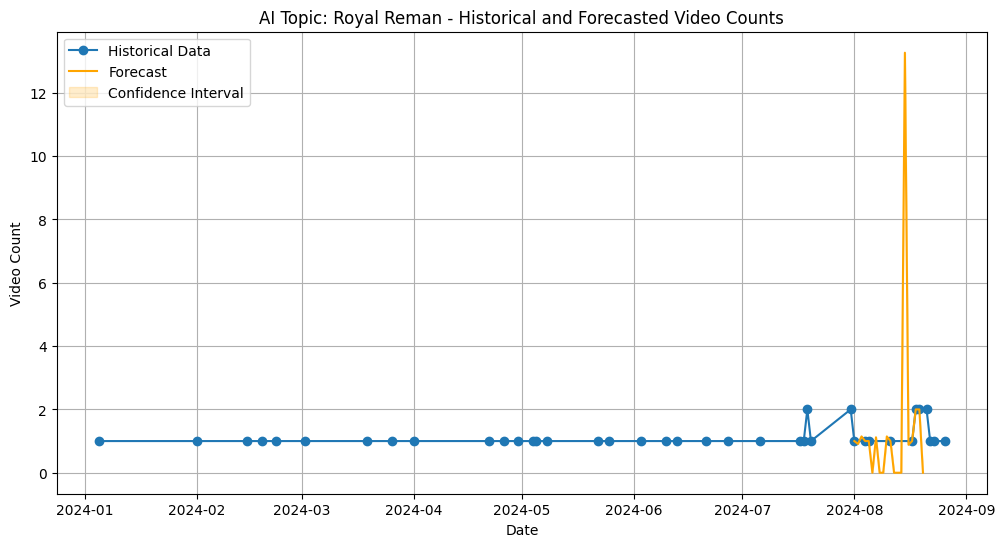

INFO:prophet:Found custom seasonality named 'weekly', disabling built-in 'weekly' seasonality.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /var/folders/77/d46tdgsj1n37996vbzqp4qy40000gp/T/tmp88t7f24i/uafbhvys.json
DEBUG:cmdstanpy:input tempfile: /var/folders/77/d46tdgsj1n37996vbzqp4qy40000gp/T/tmp88t7f24i/89861l5j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/Users/goldiusleonard/miniconda3/envs/trend-prediction/lib/python3.11/site-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22802', 'data', 'file=/var/folders/77/d46tdgsj1n37996vbzqp4qy40000gp/T/tmp88t7f24i/uafbhvys.json', 'init=/var/folders/77/d46tdgsj1n37996vbzqp4qy40000gp/T/tmp88t7f24i/89861l5j.json', 'output', 'file=/var/folders/77/d46tdgsj1n37996vbzqp4qy40000gp/T/tmp88t7f24i/prophet_model91kt9q0y/prophet_model-20241217234302.csv', 'method=optimize', 'algorithm=n

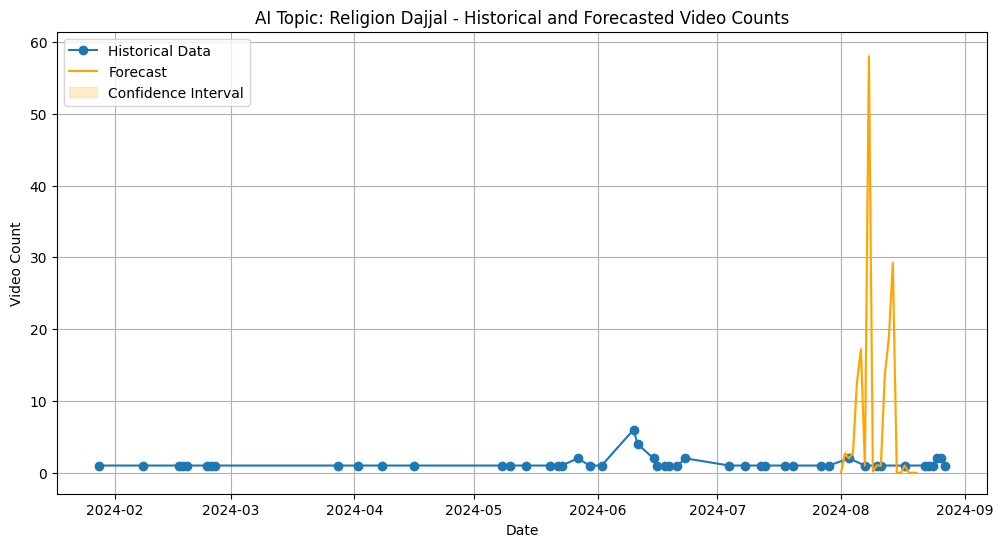

INFO:prophet:Found custom seasonality named 'weekly', disabling built-in 'weekly' seasonality.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /var/folders/77/d46tdgsj1n37996vbzqp4qy40000gp/T/tmp88t7f24i/jw9bjrrf.json
DEBUG:cmdstanpy:input tempfile: /var/folders/77/d46tdgsj1n37996vbzqp4qy40000gp/T/tmp88t7f24i/aumy320l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/Users/goldiusleonard/miniconda3/envs/trend-prediction/lib/python3.11/site-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54159', 'data', 'file=/var/folders/77/d46tdgsj1n37996vbzqp4qy40000gp/T/tmp88t7f24i/jw9bjrrf.json', 'init=/var/folders/77/d46tdgsj1n37996vbzqp4qy40000gp/T/tmp88t7f24i/aumy320l.json', 'output', 'file=/var/folders/77/d46tdgsj1n37996vbzqp4qy40000gp/T/tmp88t7f24i/prophet_modelxg62q5l7/prophet_model-20241217234303.csv', 'method=optimize', 'algorithm=l

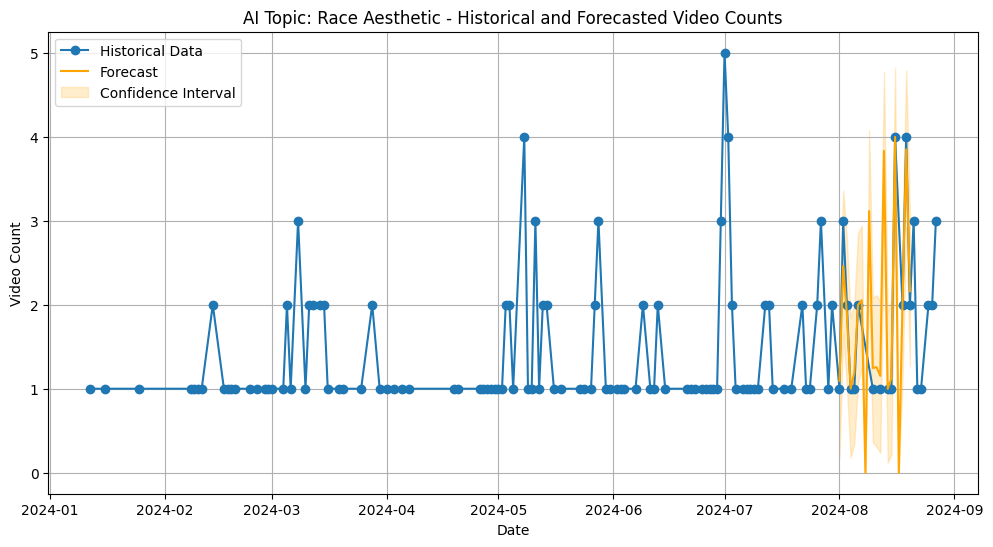

INFO:prophet:Found custom seasonality named 'weekly', disabling built-in 'weekly' seasonality.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /var/folders/77/d46tdgsj1n37996vbzqp4qy40000gp/T/tmp88t7f24i/qhpuznij.json
DEBUG:cmdstanpy:input tempfile: /var/folders/77/d46tdgsj1n37996vbzqp4qy40000gp/T/tmp88t7f24i/ga57etsp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/Users/goldiusleonard/miniconda3/envs/trend-prediction/lib/python3.11/site-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26400', 'data', 'file=/var/folders/77/d46tdgsj1n37996vbzqp4qy40000gp/T/tmp88t7f24i/qhpuznij.json', 'init=/var/folders/77/d46tdgsj1n37996vbzqp4qy40000gp/T/tmp88t7f24i/ga57etsp.json', 'output', 'file=/var/folders/77/d46tdgsj1n37996vbzqp4qy40000gp/T/tmp88t7f24i/prophet_modelahrg36gg/prophet_model-20241217234303.csv', 'method=optimize', 'algorithm=n

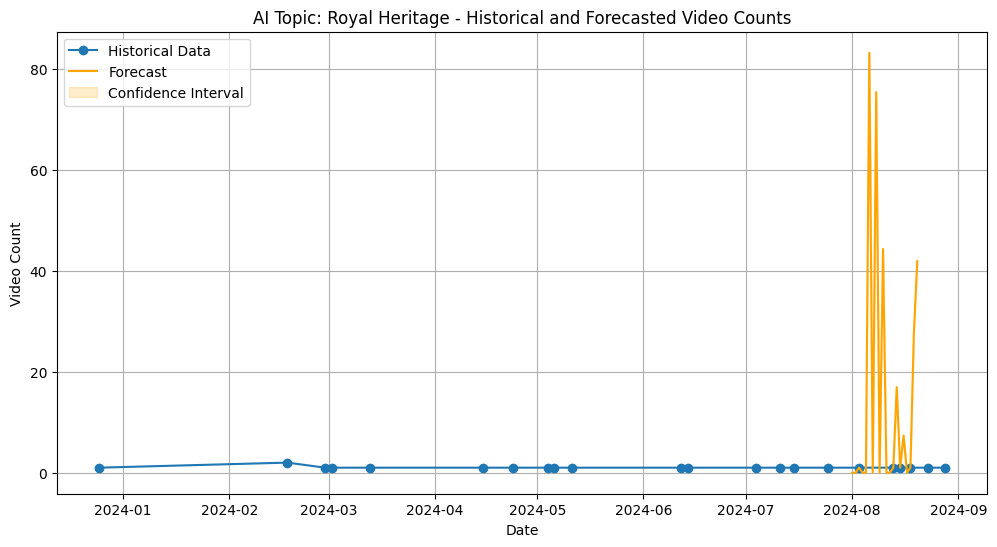

INFO:prophet:Found custom seasonality named 'weekly', disabling built-in 'weekly' seasonality.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /var/folders/77/d46tdgsj1n37996vbzqp4qy40000gp/T/tmp88t7f24i/0ckn8_zs.json
DEBUG:cmdstanpy:input tempfile: /var/folders/77/d46tdgsj1n37996vbzqp4qy40000gp/T/tmp88t7f24i/22fi9bli.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/Users/goldiusleonard/miniconda3/envs/trend-prediction/lib/python3.11/site-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81252', 'data', 'file=/var/folders/77/d46tdgsj1n37996vbzqp4qy40000gp/T/tmp88t7f24i/0ckn8_zs.json', 'init=/var/folders/77/d46tdgsj1n37996vbzqp4qy40000gp/T/tmp88t7f24i/22fi9bli.json', 'output', 'file=/var/folders/77/d46tdgsj1n37996vbzqp4qy40000gp/T/tmp88t7f24i/prophet_modelwodjp_74/prophet_model-20241217234319.csv', 'method=optimize', 'algorithm=l

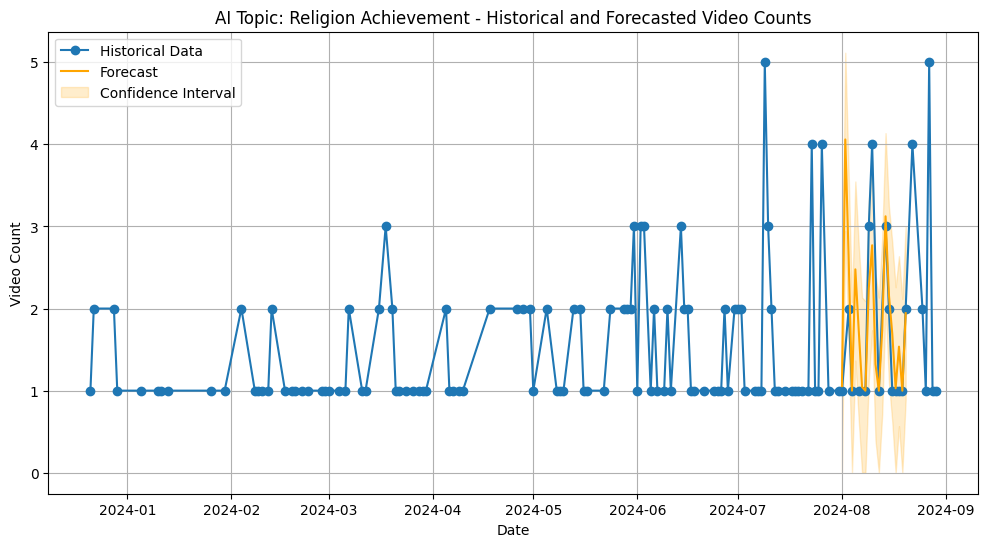

INFO:prophet:Found custom seasonality named 'weekly', disabling built-in 'weekly' seasonality.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


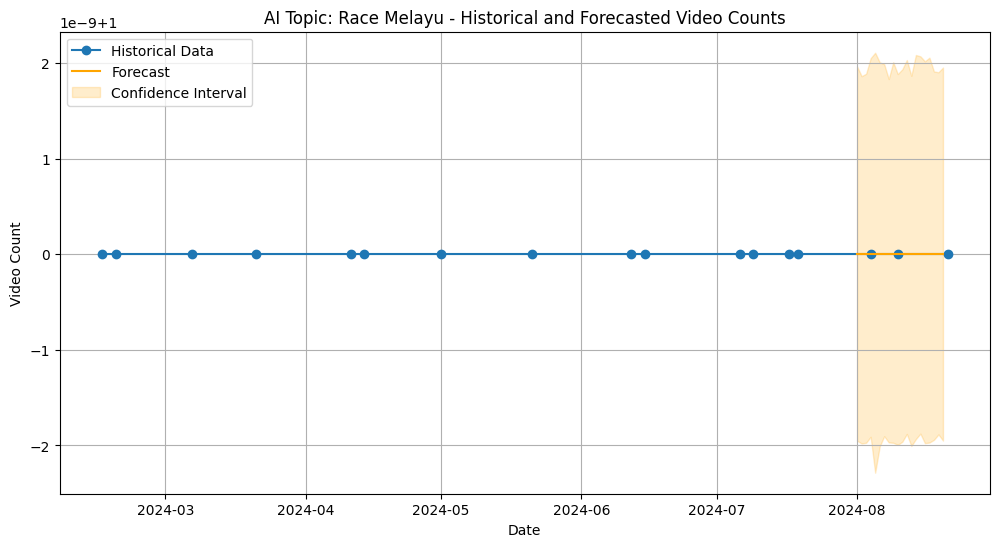

INFO:prophet:Found custom seasonality named 'weekly', disabling built-in 'weekly' seasonality.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /var/folders/77/d46tdgsj1n37996vbzqp4qy40000gp/T/tmp88t7f24i/ax0f7qjp.json
DEBUG:cmdstanpy:input tempfile: /var/folders/77/d46tdgsj1n37996vbzqp4qy40000gp/T/tmp88t7f24i/en_867s4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/Users/goldiusleonard/miniconda3/envs/trend-prediction/lib/python3.11/site-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95134', 'data', 'file=/var/folders/77/d46tdgsj1n37996vbzqp4qy40000gp/T/tmp88t7f24i/ax0f7qjp.json', 'init=/var/folders/77/d46tdgsj1n37996vbzqp4qy40000gp/T/tmp88t7f24i/en_867s4.json', 'output', 'file=/var/folders/77/d46tdgsj1n37996vbzqp4qy40000gp/T/tmp88t7f24i/prophet_modeldp5z9j5d/prophet_model-20241217234319.csv', 'method=optimize', 'algorithm=l

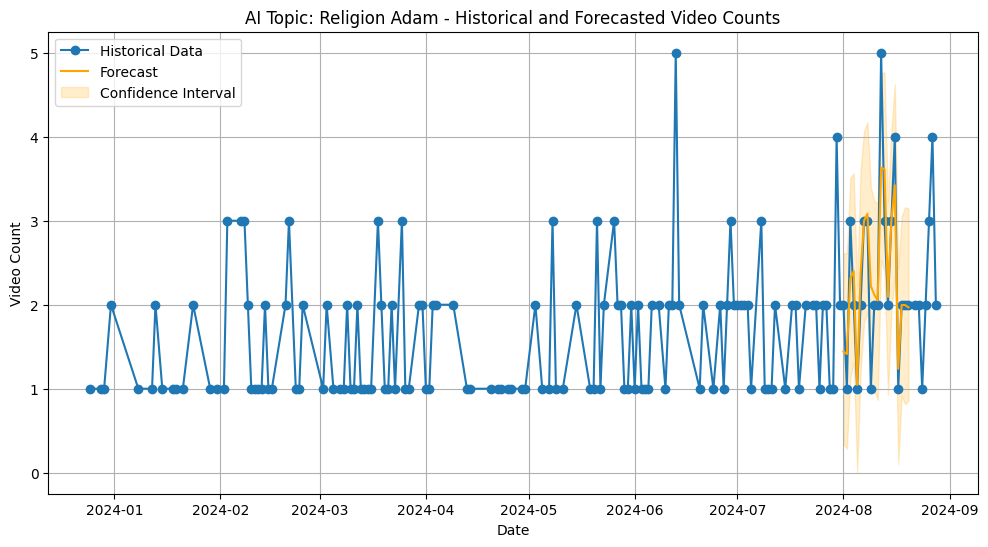

INFO:prophet:Found custom seasonality named 'weekly', disabling built-in 'weekly' seasonality.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


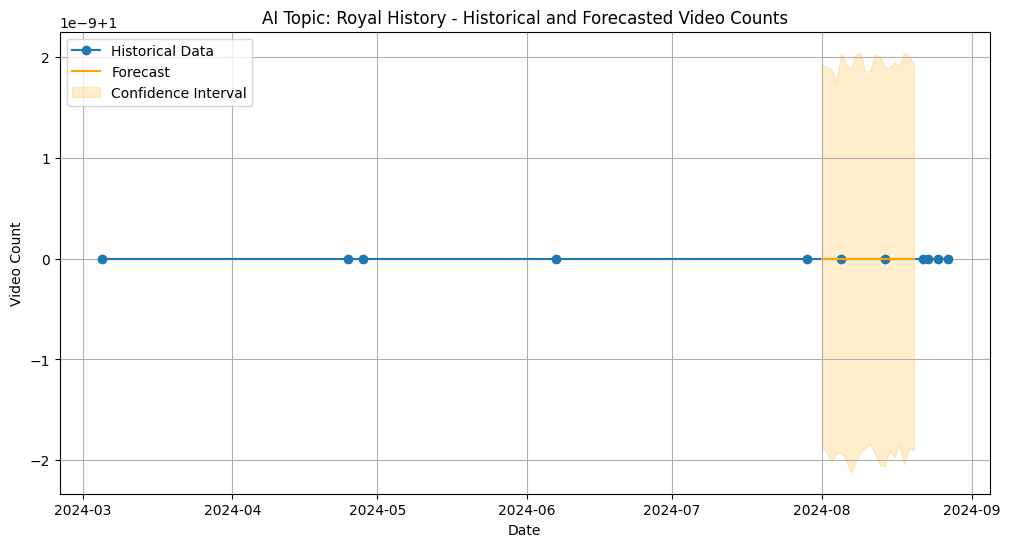

INFO:prophet:Found custom seasonality named 'weekly', disabling built-in 'weekly' seasonality.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


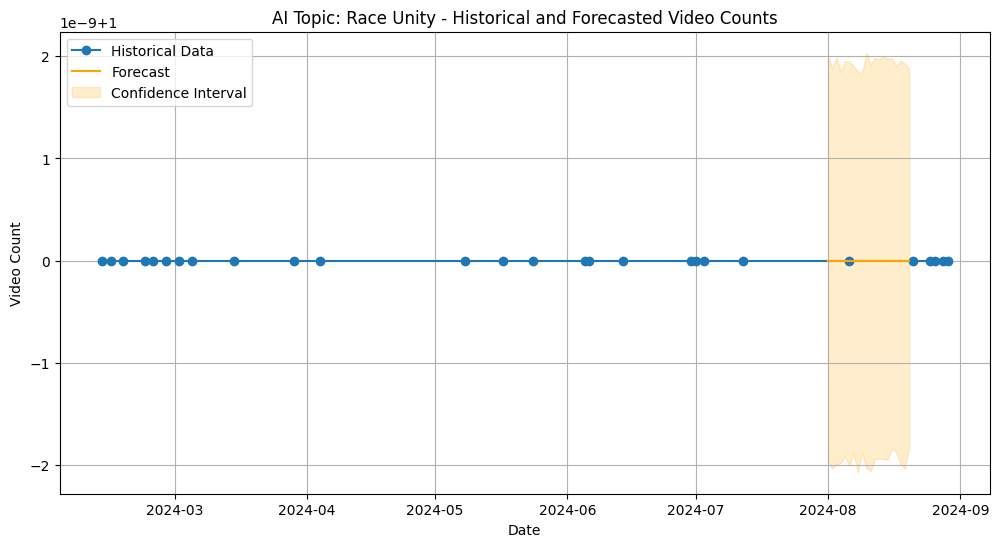

INFO:prophet:Found custom seasonality named 'weekly', disabling built-in 'weekly' seasonality.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /var/folders/77/d46tdgsj1n37996vbzqp4qy40000gp/T/tmp88t7f24i/om28dmqj.json
DEBUG:cmdstanpy:input tempfile: /var/folders/77/d46tdgsj1n37996vbzqp4qy40000gp/T/tmp88t7f24i/rrf455t_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/Users/goldiusleonard/miniconda3/envs/trend-prediction/lib/python3.11/site-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67162', 'data', 'file=/var/folders/77/d46tdgsj1n37996vbzqp4qy40000gp/T/tmp88t7f24i/om28dmqj.json', 'init=/var/folders/77/d46tdgsj1n37996vbzqp4qy40000gp/T/tmp88t7f24i/rrf455t_.json', 'output', 'file=/var/folders/77/d46tdgsj1n37996vbzqp4qy40000gp/T/tmp88t7f24i/prophet_model0lr7ykv5/prophet_model-20241217234319.csv', 'method=optimize', 'algorithm=n

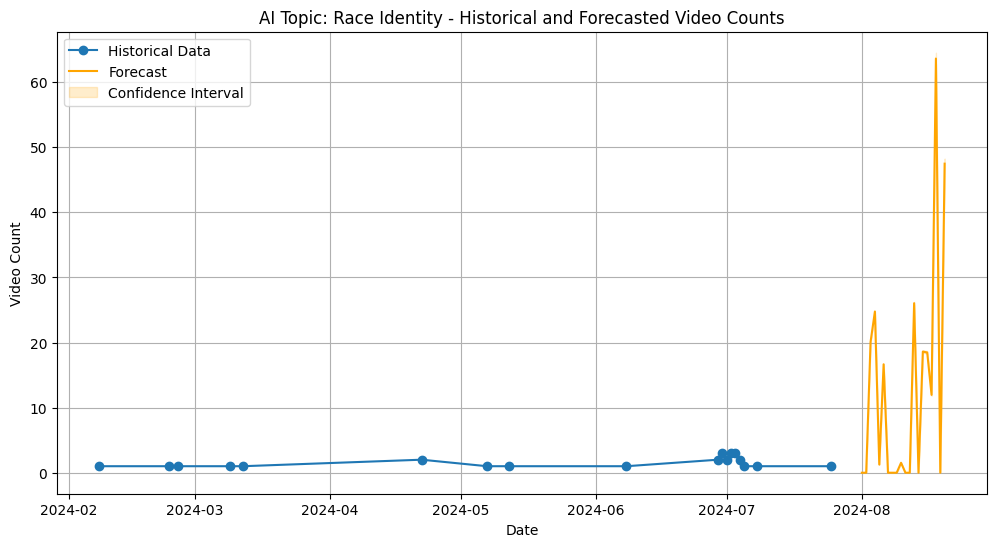

INFO:prophet:Found custom seasonality named 'weekly', disabling built-in 'weekly' seasonality.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /var/folders/77/d46tdgsj1n37996vbzqp4qy40000gp/T/tmp88t7f24i/74eyn79v.json
DEBUG:cmdstanpy:input tempfile: /var/folders/77/d46tdgsj1n37996vbzqp4qy40000gp/T/tmp88t7f24i/mj_aygf7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/Users/goldiusleonard/miniconda3/envs/trend-prediction/lib/python3.11/site-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82733', 'data', 'file=/var/folders/77/d46tdgsj1n37996vbzqp4qy40000gp/T/tmp88t7f24i/74eyn79v.json', 'init=/var/folders/77/d46tdgsj1n37996vbzqp4qy40000gp/T/tmp88t7f24i/mj_aygf7.json', 'output', 'file=/var/folders/77/d46tdgsj1n37996vbzqp4qy40000gp/T/tmp88t7f24i/prophet_model47u1g0xo/prophet_model-20241217234334.csv', 'method=optimize', 'algorithm=n

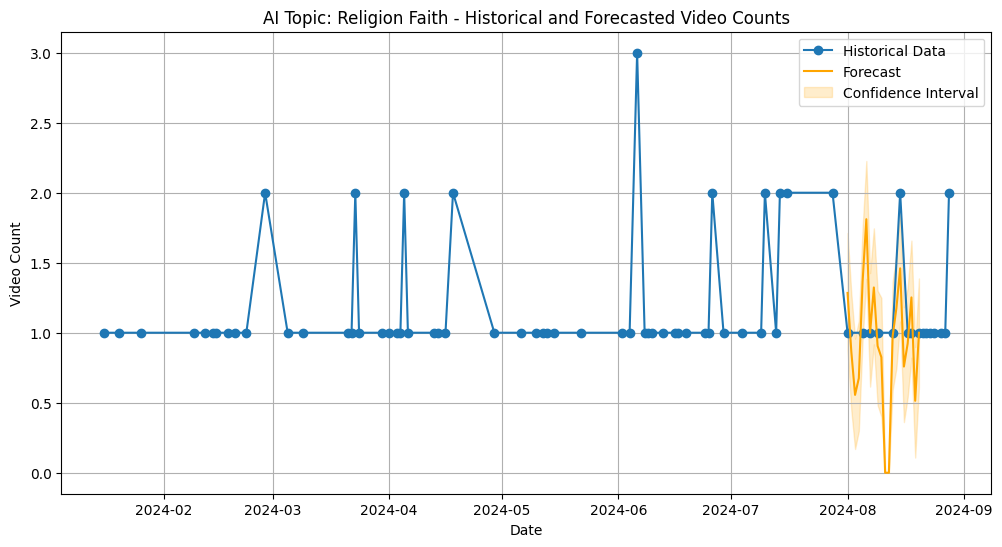

INFO:prophet:Found custom seasonality named 'weekly', disabling built-in 'weekly' seasonality.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /var/folders/77/d46tdgsj1n37996vbzqp4qy40000gp/T/tmp88t7f24i/5rbl7scu.json
DEBUG:cmdstanpy:input tempfile: /var/folders/77/d46tdgsj1n37996vbzqp4qy40000gp/T/tmp88t7f24i/spd0o0l1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/Users/goldiusleonard/miniconda3/envs/trend-prediction/lib/python3.11/site-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10263', 'data', 'file=/var/folders/77/d46tdgsj1n37996vbzqp4qy40000gp/T/tmp88t7f24i/5rbl7scu.json', 'init=/var/folders/77/d46tdgsj1n37996vbzqp4qy40000gp/T/tmp88t7f24i/spd0o0l1.json', 'output', 'file=/var/folders/77/d46tdgsj1n37996vbzqp4qy40000gp/T/tmp88t7f24i/prophet_model_lssv5jx/prophet_model-20241217234335.csv', 'method=optimize', 'algorithm=n

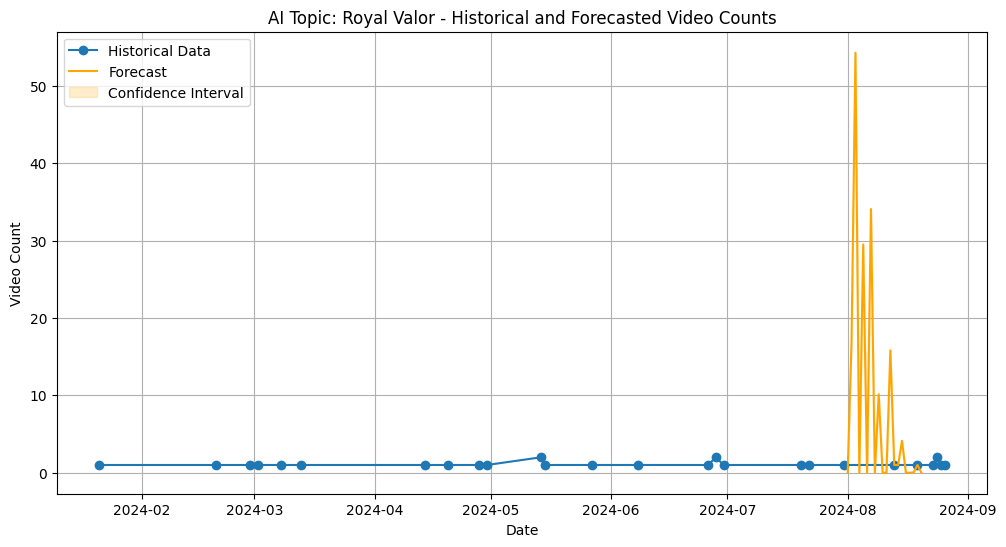

INFO:prophet:Found custom seasonality named 'weekly', disabling built-in 'weekly' seasonality.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /var/folders/77/d46tdgsj1n37996vbzqp4qy40000gp/T/tmp88t7f24i/mg9zqkyv.json
DEBUG:cmdstanpy:input tempfile: /var/folders/77/d46tdgsj1n37996vbzqp4qy40000gp/T/tmp88t7f24i/sx0mk5mm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/Users/goldiusleonard/miniconda3/envs/trend-prediction/lib/python3.11/site-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2076', 'data', 'file=/var/folders/77/d46tdgsj1n37996vbzqp4qy40000gp/T/tmp88t7f24i/mg9zqkyv.json', 'init=/var/folders/77/d46tdgsj1n37996vbzqp4qy40000gp/T/tmp88t7f24i/sx0mk5mm.json', 'output', 'file=/var/folders/77/d46tdgsj1n37996vbzqp4qy40000gp/T/tmp88t7f24i/prophet_modelu86mzwr_/prophet_model-20241217234351.csv', 'method=optimize', 'algorithm=ne

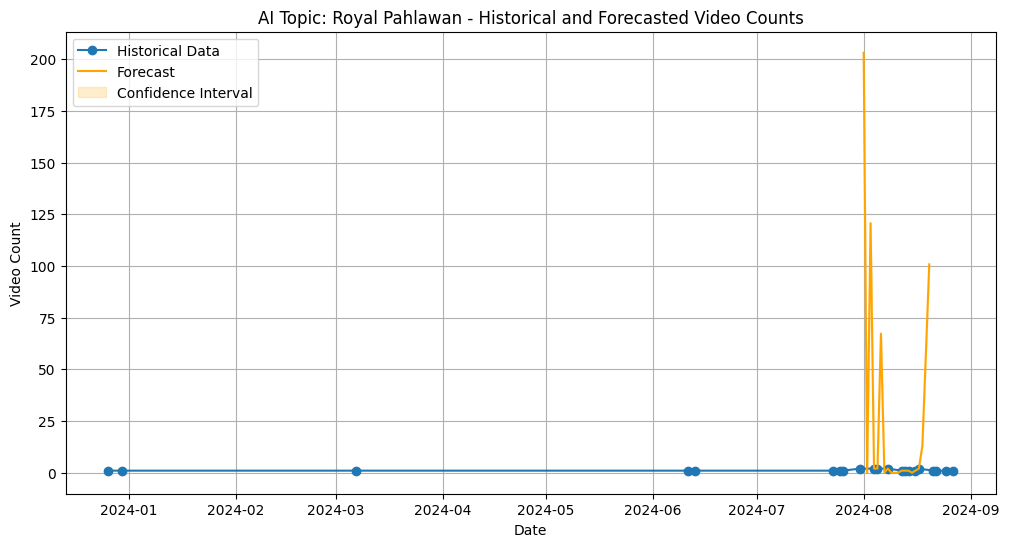

INFO:prophet:Found custom seasonality named 'weekly', disabling built-in 'weekly' seasonality.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /var/folders/77/d46tdgsj1n37996vbzqp4qy40000gp/T/tmp88t7f24i/09muzaal.json
DEBUG:cmdstanpy:input tempfile: /var/folders/77/d46tdgsj1n37996vbzqp4qy40000gp/T/tmp88t7f24i/2dlo8816.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/Users/goldiusleonard/miniconda3/envs/trend-prediction/lib/python3.11/site-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79914', 'data', 'file=/var/folders/77/d46tdgsj1n37996vbzqp4qy40000gp/T/tmp88t7f24i/09muzaal.json', 'init=/var/folders/77/d46tdgsj1n37996vbzqp4qy40000gp/T/tmp88t7f24i/2dlo8816.json', 'output', 'file=/var/folders/77/d46tdgsj1n37996vbzqp4qy40000gp/T/tmp88t7f24i/prophet_modeltt0efezx/prophet_model-20241217234409.csv', 'method=optimize', 'algorithm=n

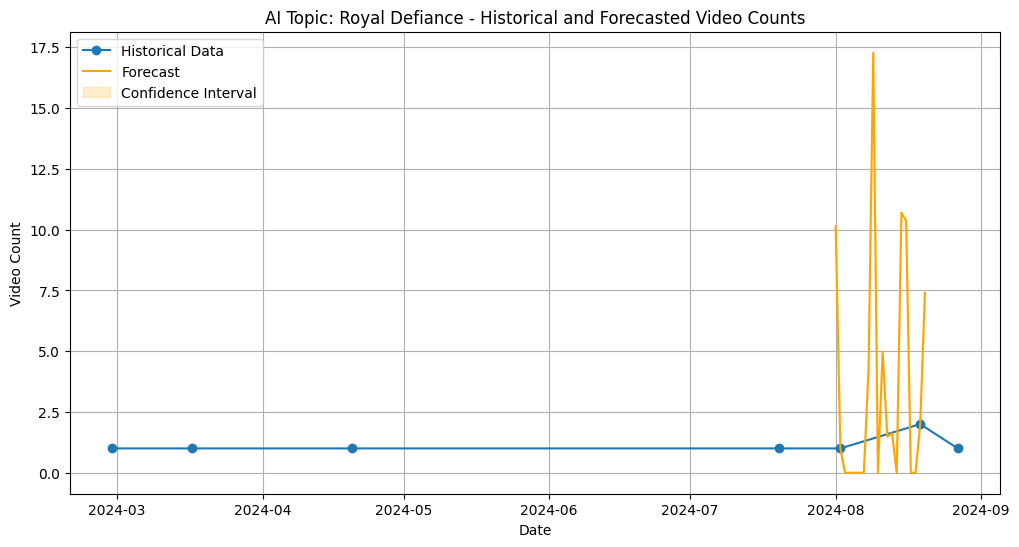

INFO:prophet:Found custom seasonality named 'weekly', disabling built-in 'weekly' seasonality.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /var/folders/77/d46tdgsj1n37996vbzqp4qy40000gp/T/tmp88t7f24i/se4k1s_4.json
DEBUG:cmdstanpy:input tempfile: /var/folders/77/d46tdgsj1n37996vbzqp4qy40000gp/T/tmp88t7f24i/p8e186zz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/Users/goldiusleonard/miniconda3/envs/trend-prediction/lib/python3.11/site-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63922', 'data', 'file=/var/folders/77/d46tdgsj1n37996vbzqp4qy40000gp/T/tmp88t7f24i/se4k1s_4.json', 'init=/var/folders/77/d46tdgsj1n37996vbzqp4qy40000gp/T/tmp88t7f24i/p8e186zz.json', 'output', 'file=/var/folders/77/d46tdgsj1n37996vbzqp4qy40000gp/T/tmp88t7f24i/prophet_model8c3e5mfb/prophet_model-20241217234422.csv', 'method=optimize', 'algorithm=n

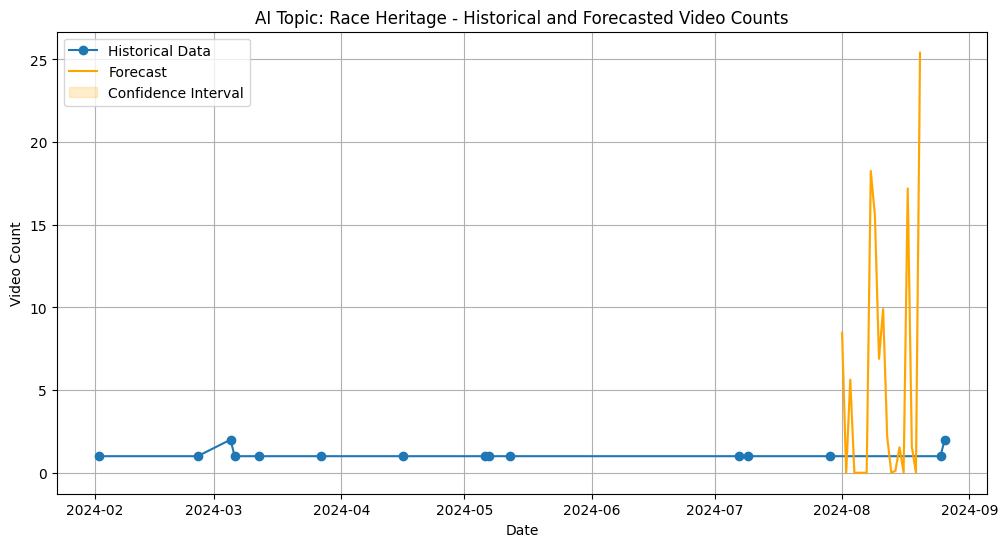

INFO:prophet:Found custom seasonality named 'weekly', disabling built-in 'weekly' seasonality.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /var/folders/77/d46tdgsj1n37996vbzqp4qy40000gp/T/tmp88t7f24i/7x8fva8g.json
DEBUG:cmdstanpy:input tempfile: /var/folders/77/d46tdgsj1n37996vbzqp4qy40000gp/T/tmp88t7f24i/pk83a99y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/Users/goldiusleonard/miniconda3/envs/trend-prediction/lib/python3.11/site-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22909', 'data', 'file=/var/folders/77/d46tdgsj1n37996vbzqp4qy40000gp/T/tmp88t7f24i/7x8fva8g.json', 'init=/var/folders/77/d46tdgsj1n37996vbzqp4qy40000gp/T/tmp88t7f24i/pk83a99y.json', 'output', 'file=/var/folders/77/d46tdgsj1n37996vbzqp4qy40000gp/T/tmp88t7f24i/prophet_modelvx3wmdh5/prophet_model-20241217234436.csv', 'method=optimize', 'algorithm=n

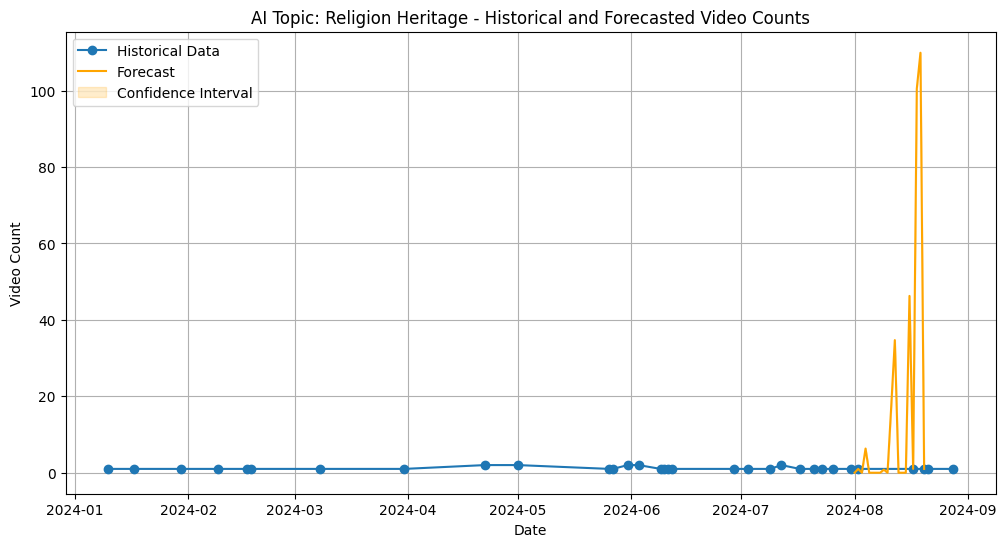

INFO:prophet:Found custom seasonality named 'weekly', disabling built-in 'weekly' seasonality.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


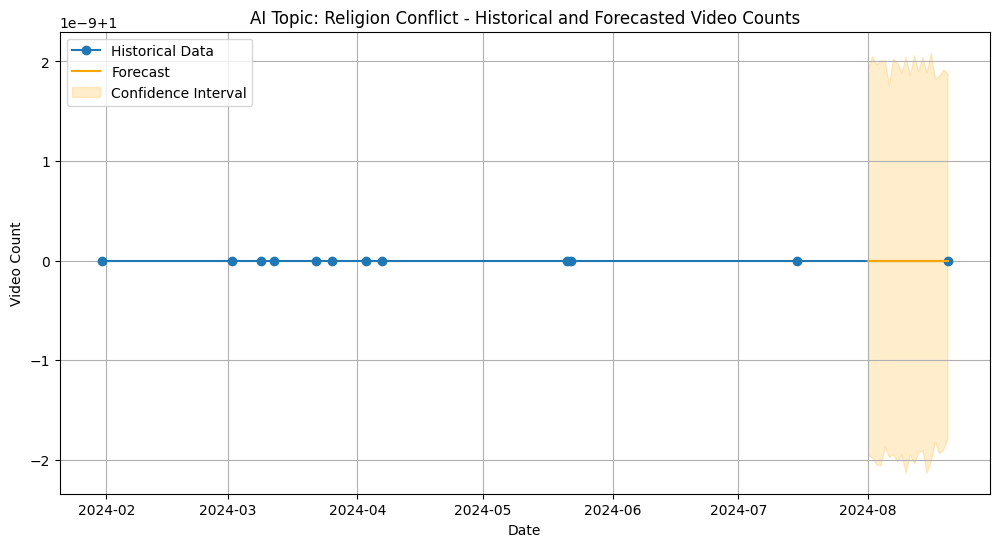

INFO:prophet:Found custom seasonality named 'weekly', disabling built-in 'weekly' seasonality.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /var/folders/77/d46tdgsj1n37996vbzqp4qy40000gp/T/tmp88t7f24i/189zqjz4.json
DEBUG:cmdstanpy:input tempfile: /var/folders/77/d46tdgsj1n37996vbzqp4qy40000gp/T/tmp88t7f24i/vpq7btz2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/Users/goldiusleonard/miniconda3/envs/trend-prediction/lib/python3.11/site-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56947', 'data', 'file=/var/folders/77/d46tdgsj1n37996vbzqp4qy40000gp/T/tmp88t7f24i/189zqjz4.json', 'init=/var/folders/77/d46tdgsj1n37996vbzqp4qy40000gp/T/tmp88t7f24i/vpq7btz2.json', 'output', 'file=/var/folders/77/d46tdgsj1n37996vbzqp4qy40000gp/T/tmp88t7f24i/prophet_model4fxjxwq_/prophet_model-20241217234454.csv', 'method=optimize', 'algorithm=n

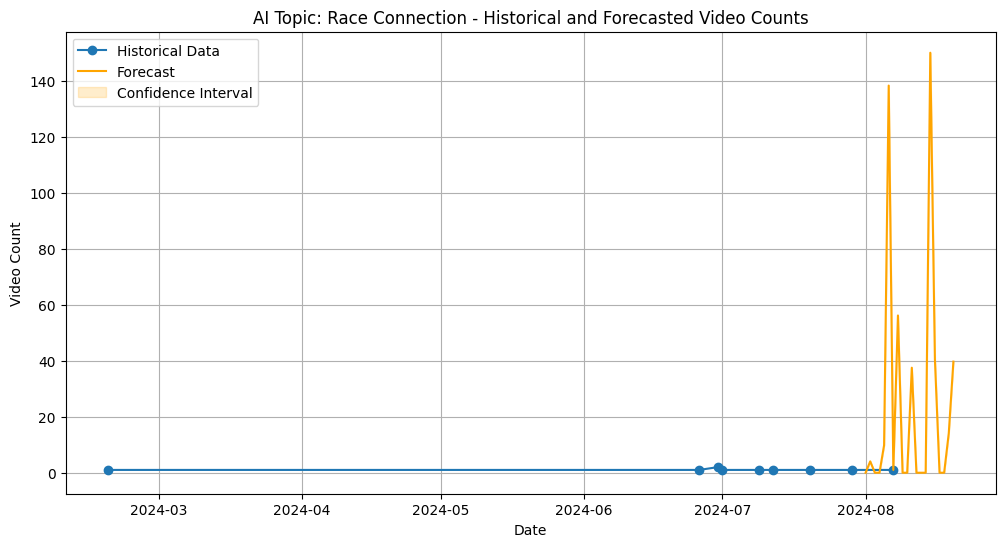

INFO:prophet:Found custom seasonality named 'weekly', disabling built-in 'weekly' seasonality.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Skipping category 'None' due to insufficient data.


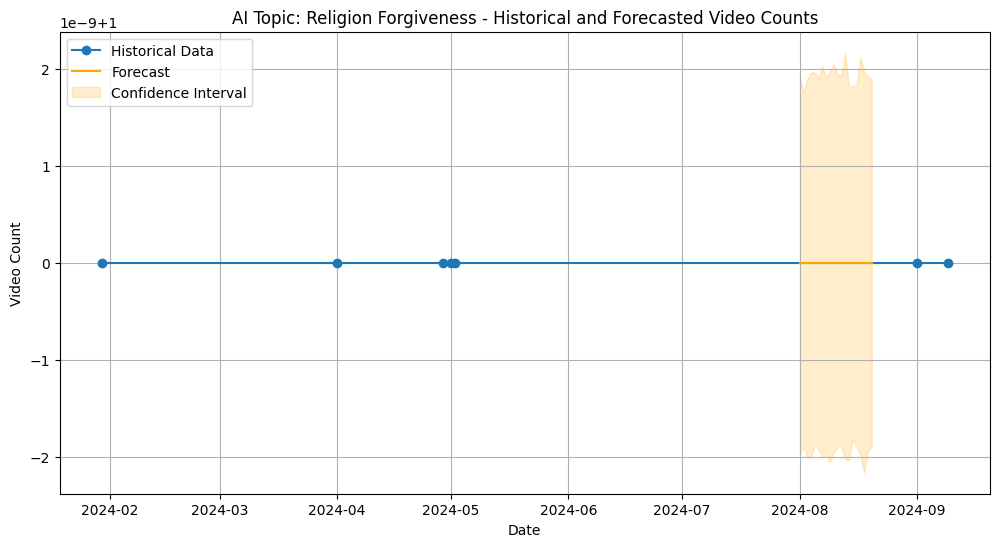

INFO:prophet:Found custom seasonality named 'weekly', disabling built-in 'weekly' seasonality.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


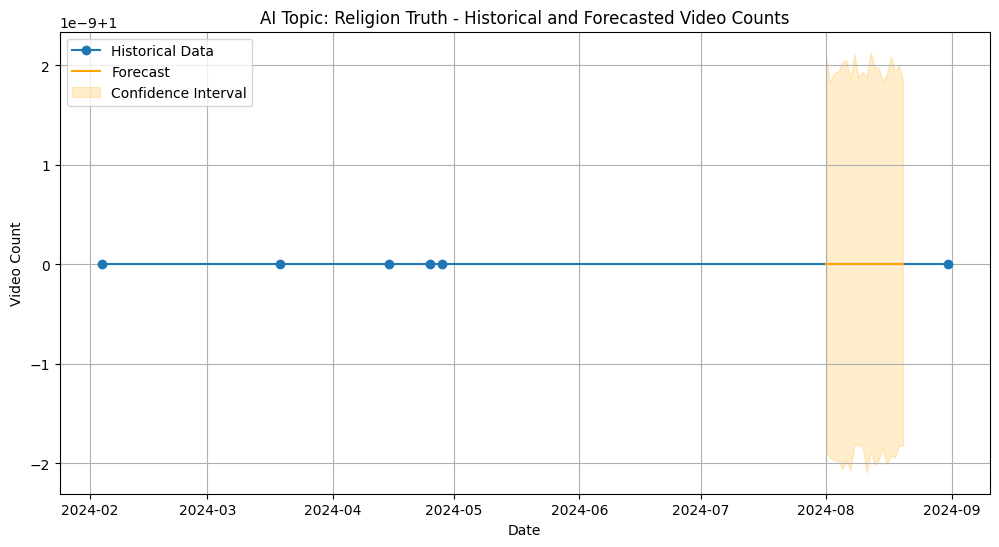

INFO:prophet:Found custom seasonality named 'weekly', disabling built-in 'weekly' seasonality.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


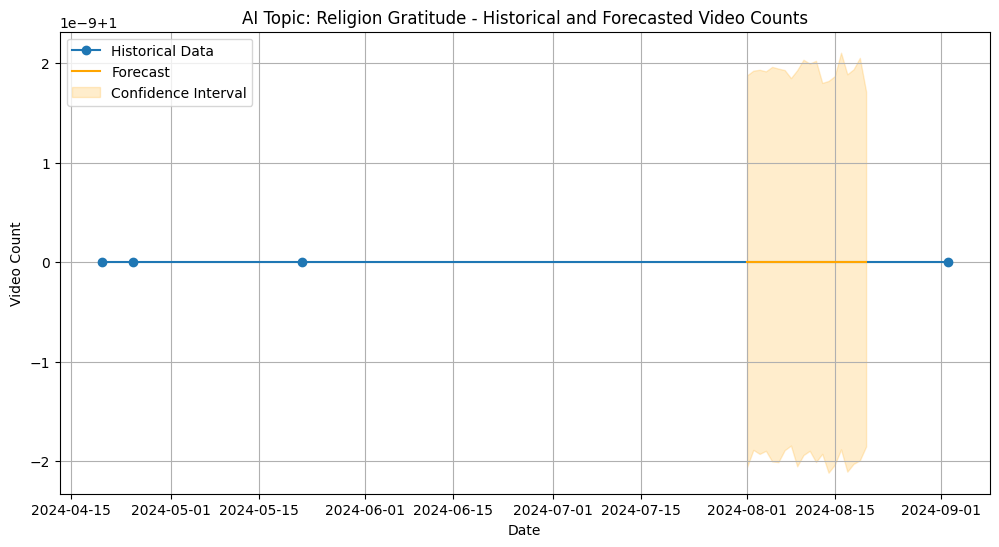

INFO:prophet:Found custom seasonality named 'weekly', disabling built-in 'weekly' seasonality.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


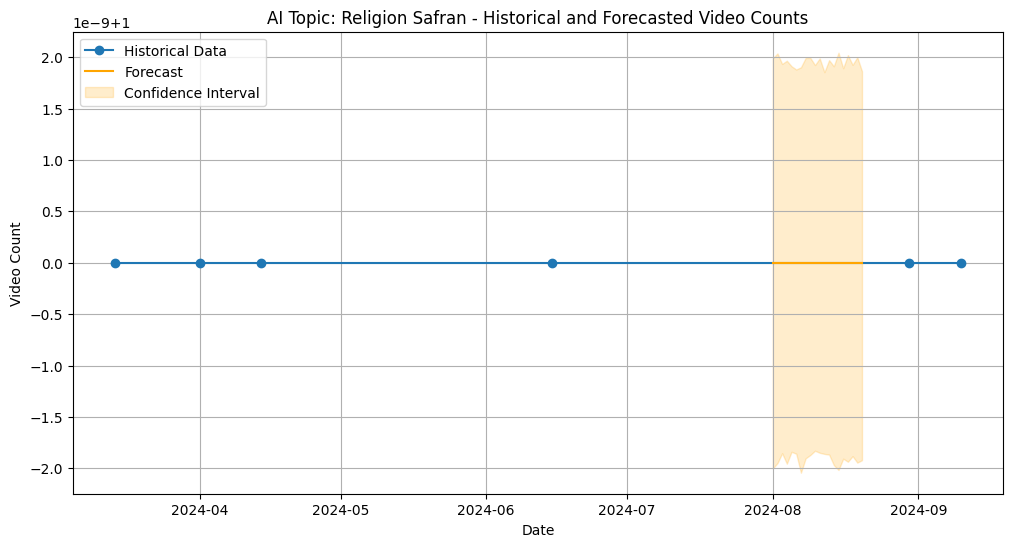

INFO:prophet:Found custom seasonality named 'weekly', disabling built-in 'weekly' seasonality.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Skipping category 'Race History' due to insufficient data.
Skipping category 'Royal Kingdom' due to insufficient data.


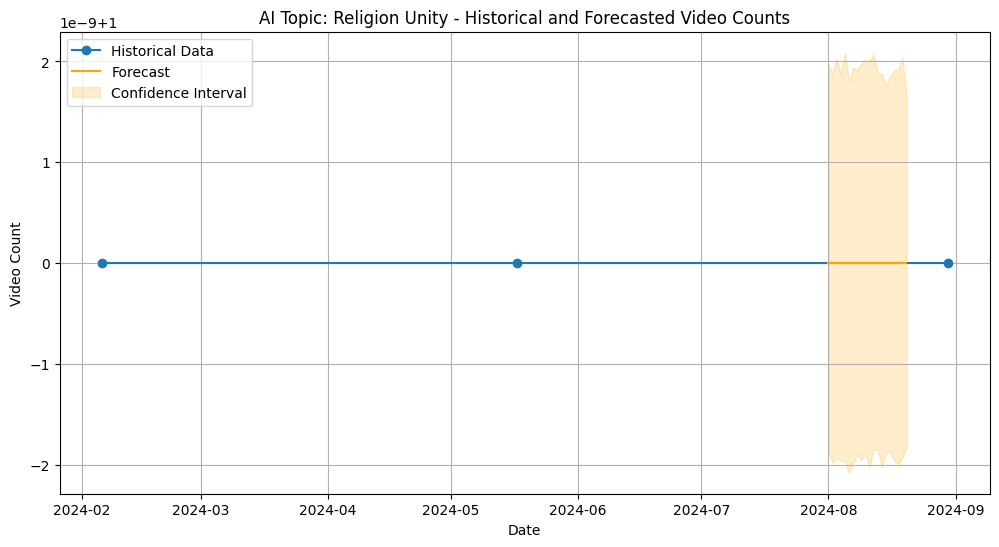

INFO:prophet:Found custom seasonality named 'weekly', disabling built-in 'weekly' seasonality.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


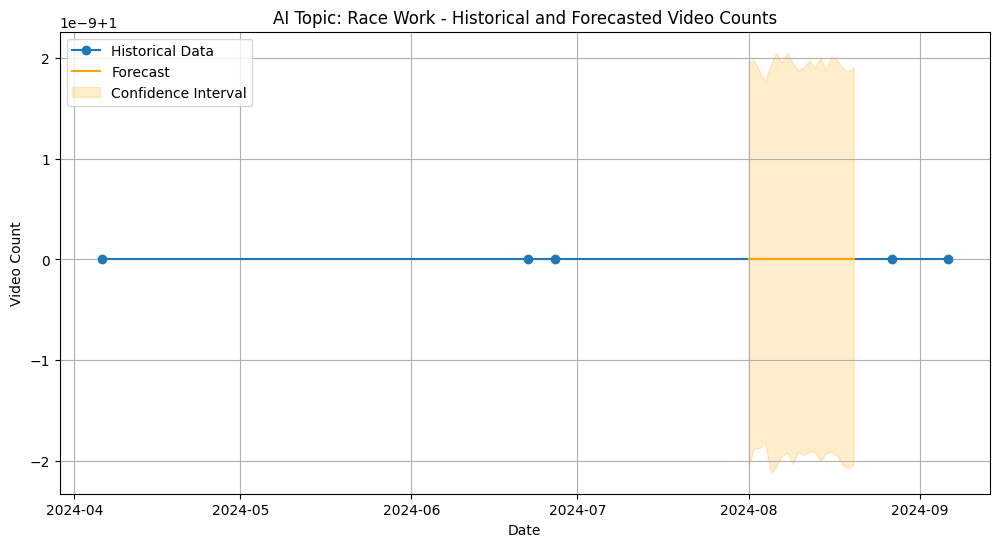

Skipping category 'Royal Sultan' due to insufficient data.
Skipping category 'Royal Succession' due to insufficient data.
Model Evaluation Metrics:
      Category       MAE      RMSE   MAPE (%)
0  Hate Speech  1.821281  2.447754  40.865627
Model Evaluation Metrics:
      Category       MAE      RMSE   MAPE (%)
0  Hate Speech  1.821281  2.447754  40.865627


In [4]:
# Initialize a DataFrame to store all forecasts
all_forecasts = pd.DataFrame()
# Simulated user input
user_selection = 'ai_topic'  # Could be 'category', 'sub_category', or 'ai_topic'
start_date = '2024-08-01'
end_date = '2024-08-20'
# Iterate through each category and predict video counts
unique_categories = filtered_video_df['ai_topic'].unique()
# Iterate through each category and predict video counts
for category in unique_categories:
    # Filter data for the current category
    category_data = filtered_video_df[filtered_video_df['ai_topic'] == category]
    # Group by date and count videos
    grouped_data = category_data.groupby(category_data['video_posted_timestamp'].dt.date).size().reset_index(name='count')
    # Prepare data for Prophet
    time_series_data = grouped_data.rename(columns={'video_posted_timestamp': 'ds', 'count': 'y'})
    # Skip if there are less than 2 data points
    if time_series_data.shape[0] < 2:
        print(f"Skipping category '{category}' due to insufficient data.")
        continue

    # Initialize the Prophet model
    num_changepoints = 5
    changepoints = category_data['video_posted_timestamp'].quantile(np.linspace(0.1, 0.9, num_changepoints))
    model = Prophet(
        growth='linear',
        changepoint_prior_scale=1.0,
        yearly_seasonality=False,
        seasonality_mode='multiplicative',
        seasonality_prior_scale=14,
        changepoints=changepoints,
        interval_width=0.95,
    )
    model.add_seasonality(name='weekly', period=7, fourier_order=5)
    model.add_seasonality(name='monthly', period=30.5, fourier_order=30)
    
    model.fit(time_series_data)
    # Create a future DataFrame specifically for the start_date to end_date range
    future_dates = pd.date_range(start=start_date, end=end_date)
    future = pd.DataFrame({'ds': future_dates})
    # Predict for the specified date range
    forecast = model.predict(future)

    # Modify predicted video counts to ensure they are not negative
    forecast['yhat'] = forecast['yhat'].clip(lower=0)
    forecast['yhat_lower'] = forecast['yhat_lower'].clip(lower=0)
    forecast['yhat_upper'] = forecast['yhat_upper'].clip(lower=0)

    # Add the forecast to the result DataFrame
    forecast['ai_topic'] = category
    all_forecasts = pd.concat([all_forecasts, forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'ai_topic']]], ignore_index=True)
    # Plot historical and forecasted data
    plt.figure(figsize=(12, 6))
    plt.plot(time_series_data['ds'], time_series_data['y'], label='Historical Data', marker='o')
    plt.plot(forecast['ds'], forecast['yhat'], label='Forecast', color='orange')
    plt.fill_between(
        forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='orange', alpha=0.2, label='Confidence Interval'
    )
    plt.title(f"AI Topic: {category} - Historical and Forecasted Video Counts")
    plt.xlabel("Date")
    plt.ylabel("Video Count")
    plt.legend()
    plt.grid()
    plt.show()
# Rename columns for clarity
all_forecasts.rename(columns={'ds': 'Date', 'yhat': 'Predicted Video Count'}, inplace=True)
# Filter the forecast table to include only the specified date range
filtered_forecasts = all_forecasts[(all_forecasts['Date'] >= start_date) & (all_forecasts['Date'] <= end_date)]
# Display the final forecast table
# print(filtered_forecasts)

# Display the evaluation results
evaluation_df = pd.DataFrame(evaluation_results)
print("Model Evaluation Metrics:")
print(evaluation_df)

# Rename columns for clarity
all_forecasts.rename(columns={'ds': 'Date', 'yhat': 'Predicted Video Count'}, inplace=True)
# Filter the forecast table to include only the specified date range
filtered_forecasts = all_forecasts[(all_forecasts['Date'] >= start_date) & (all_forecasts['Date'] <= end_date)]
# Display the final forecast table
# print(filtered_forecasts)

# Display the evaluation results
evaluation_df = pd.DataFrame(evaluation_results)
print("Model Evaluation Metrics:")
print(evaluation_df)